## How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
%matplotlib inline

None


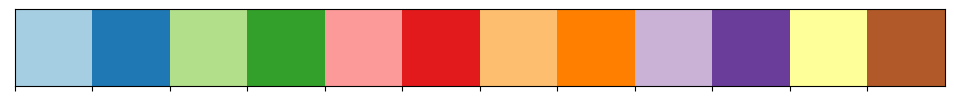

In [2]:
print(sns.palplot(sns.color_palette("Paired").as_hex()))

In [3]:
df = pd.read_csv(r"C:\Users\jhank\Desktop\DA7\Projects\wego-shut_up_and_take_my_query\data\Headway Data.csv")
#df = pd.read_csv(r"/home/jwhankins177/projects/wego/data/Headway Data.csv")

In [4]:
df.tail(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,23,9.166666
1981706,120221101,1,91057373,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,24,9.416666
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,31.933333
1981708,120221101,1,91057382,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,0.000000
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,20.916666
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

Determine length of service per driver

In [89]:
service = df[['OPERATOR','DATE']]

In [6]:
df['OPERATOR'].nunique()

458

#### Create a dataframe containing relevant info.

In [7]:
time = df[['OPERATOR','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 4 columns):
 #   Column                 Dtype
---  ------                 -----
 0   OPERATOR               int64
 1   ADJUSTED_ONTIME_COUNT  int64
 2   ADJUSTED_EARLY_COUNT   int64
 3   ADJUSTED_LATE_COUNT    int64
dtypes: int64(4)
memory usage: 60.5 MB


Rename columns

In [8]:
time.columns=['operator','ontime','early','late']

In [9]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 4 columns):
 #   Column    Dtype
---  ------    -----
 0   operator  int64
 1   ontime    int64
 2   early     int64
 3   late      int64
dtypes: int64(4)
memory usage: 60.5 MB


Group by operator

In [10]:
time_gb = time.groupby(['operator'],as_index = False)['ontime','early','late'].sum()

C:\Users\jhank\AppData\Local\Temp\ipykernel_12100\1898847286.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_gb = time.groupby(['operator'],as_index = False)['ontime','early','late'].sum()


In [11]:
time_gb

,operator,ontime,early,late
0,0,98,1,26
1,30,0,2,0
2,85,0,1,0
3,86,24,3,1
4,93,5,0,1
...,...,...,...,...
453,2622,429,20,52
454,2623,195,2,3
455,2624,31,0,10
456,2630,190,10,28


In [12]:
time_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   operator  458 non-null    int64
 1   ontime    458 non-null    int64
 2   early     458 non-null    int64
 3   late      458 non-null    int64
dtypes: int64(4)
memory usage: 14.4 KB


Add column with total count

In [13]:
time_gb['total'] = (time_gb['ontime'] + time_gb['early'] + time_gb['late'])

In [14]:
time_gb.head()

,operator,ontime,early,late,total
0,0,98,1,26,125
1,30,0,2,0,2
2,85,0,1,0,1
3,86,24,3,1,28
4,93,5,0,1,6


Add column with avg on time rate

In [15]:
time_gb['pct_on_time'] = round((time_gb['ontime']/time_gb['total'])*100,0)


In [16]:
time_gb['pct_on_time_5'] = round((time_gb['ontime']/time_gb['total'])*100,5)

In [17]:
time_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   operator       458 non-null    int64  
 1   ontime         458 non-null    int64  
 2   early          458 non-null    int64  
 3   late           458 non-null    int64  
 4   total          458 non-null    int64  
 5   pct_on_time    455 non-null    float64
 6   pct_on_time_5  455 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 25.2 KB


In [18]:
time_gb.head(20)

,operator,ontime,early,late,total,pct_on_time,pct_on_time_5
0,0,98,1,26,125,78.0,78.40000
1,30,0,2,0,2,0.0,0.00000
2,85,0,1,0,1,0.0,0.00000
3,86,24,3,1,28,86.0,85.71429
4,93,5,0,1,6,83.0,83.33333
5,195,14,0,6,20,70.0,70.00000
6,212,15,1,8,24,62.0,62.50000
7,230,128,0,5,133,96.0,96.24060
8,235,39,0,0,39,100.0,100.00000
9,242,1,0,0,1,100.0,100.00000


In [19]:
# 149 out of 458 or % 32 of drivers have higher than a 90 percent on time count.
time_gb[time_gb['pct_on_time'] > 90.0].count()

operator         149
ontime           149
early            149
late             149
total            149
pct_on_time      149
pct_on_time_5    149
dtype: int64

In [20]:
# 366 out of 458 or % 80 of driver have a on time count higher than 75% of the time.
time_gb[time_gb['pct_on_time'] > 75].count()

operator         366
ontime           366
early            366
late             366
total            366
pct_on_time      366
pct_on_time_5    366
dtype: int64

In [61]:
# 13 out of 458 or % 3 have a on time count below 50 %.
time_gb[time_gb['pct_on_time'] < 50].count()

operator         13
ontime           13
early            13
late             13
total            13
pct_on_time      13
pct_on_time_5    13
dtype: int64

In [62]:
#below50 = time_gb[time_gb['pct_on_time'] < 55.0]

In [75]:
below50 = time_gb[time_gb['total'] >= 100]

In [78]:
below50 = below50.sort_values('pct_on_time',ascending = True)

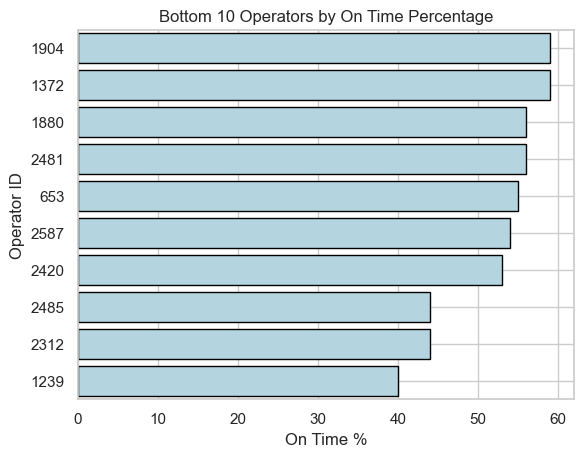

In [94]:
sns.barplot(y = 'operator', x = 'pct_on_time',
            data=graph50,edgecolor="0",orient = 'h',color='lightblue',order=graph50.sort_values('pct_on_time',ascending = False).operator).set(title = 'Bottom 10 Operators by On Time Percentage',xlabel='On Time %',ylabel='Operator ID')
sns.set_theme(style='whitegrid', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.grid(visible = True, axis = 'y')

In [67]:
#above90 = time_gb[time_gb['pct_on_time'] > 98.0]

In [68]:
above90

,operator,ontime,early,late,total,pct_on_time,pct_on_time_5
8,235,39,0,0,39,100.0,100.00000
9,242,1,0,0,1,100.0,100.00000
14,315,1,0,0,1,100.0,100.00000
25,386,4208,6,58,4272,99.0,98.50187
69,1039,24,0,0,24,100.0,100.00000
127,1378,9,0,0,9,100.0,100.00000
140,1416,14,0,0,14,100.0,100.00000
143,1427,4,0,0,4,100.0,100.00000
145,1436,15,0,0,15,100.0,100.00000
146,1456,11,0,0,11,100.0,100.00000


In [96]:
above90 = time_gb[time_gb['total'] >= 100]

In [100]:
above90 = above90.sort_values('pct_on_time',ascending = False)

In [107]:
graphtop = above90.head(10)

In [115]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

AttributeError: 'DataFrame' object has no attribute 'patches'

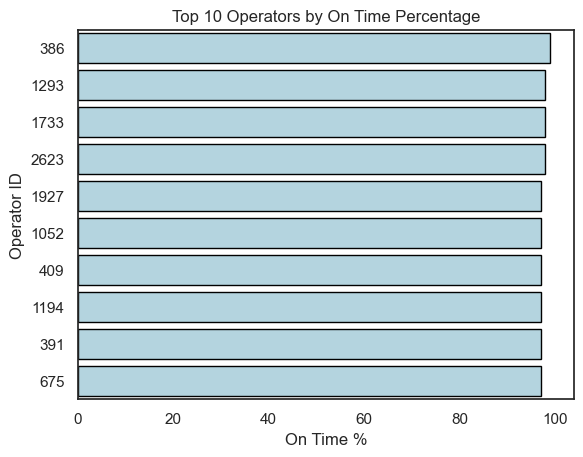

In [117]:
ax = sns.barplot(y = 'operator', x = 'pct_on_time',
            data=graphtop,edgecolor="0",orient = 'h',order=graphtop.sort_values('pct_on_time',ascending = False).operator,color='lightblue').set(title = 'Top 10 Operators by On Time Percentage',xlabel='On Time %',ylabel='Operator ID')
sns.set_theme(style='white', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=False, rc=None)
ax = pd.DataFrame(ax)

show_values(ax)